## BatchGD vs StochasticGD vs Mini-BatchGD

![](differnces.webp)

![](0_5juVrfuW5fsTNK3W.png)

#### Using bangalore price dataset we explore these three concept

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
12,1000,2,38.0
16,1180,3,48.0
7,3300,4,155.0
11,2785,4,140.0
3,1521,3,75.0


In [7]:
df.shape

(20, 3)

### Implementing Batch gradient decent and SGD in plain python

In [84]:
#train test split
from sklearn.model_selection import train_test_split
X = df[["area", "bedrooms"]]
y = df.price
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#saclling dataset with min max scalling
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.fit_transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(y_train.shape[0],1))
y_test_scaled = scaler_y.fit_transform(y_test.values.reshape(y_test.shape[0],1))

In [11]:
y_train_scaled

array([[0.13333333],
       [0.04444444],
       [0.8       ],
       [0.31851852],
       [0.51851852],
       [0.11851852],
       [0.05925926],
       [0.22222222],
       [1.        ],
       [0.        ],
       [0.14074074],
       [0.04444444],
       [0.91111111],
       [0.37037037],
       [0.51111111],
       [0.76296296]])

## Keep in mind equation:  price = w1 * area + w2 * bedrooms + bias

In [13]:
w = np.ones(shape = (3))
w

array([1., 1., 1.])

In [14]:
#Goal is to calculate wr=eight and bias for prediction
def batchGD(X, y_true, epochs, learning_rate = 0.01):
    w = np.ones(shape = (X.shape[1]))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b  #price = w1 * area + w2 * bedrooms + bias

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        #adjusting weigts 
        w = w-learning_rate * w_grad
        b = b-learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = batchGD(X_train_scaled,y_train_scaled.reshape(y_train_scaled.shape[0],),500)
w, b, cost

(array([0.69879494, 0.67124693]), -0.2209019047720029, 0.007270854350932237)

#### Prediction

In [16]:
X_test

,area,bedrooms
0,1056,2
17,1540,3
15,1175,2
1,2600,4


In [17]:
y_test

0      39.07
17     60.00
15     42.00
1     120.00
Name: price, dtype: float64

In [18]:
def predict(area, bedrooms, w, b):
    scaled_X = scaler_X.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return scaler_y.inverse_transform([[scaled_price]])[0][0]
predict(1540,3,w,b)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


66.082318359798

## Now SGD

In [20]:
import random
random.randint(0,2)

1

In [74]:
def SGD(X, y_true, epochs, learning_rate = 0.01):
    w = np.ones(shape = (X.shape[1]))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        randomidx = random.randint(0,total_samples-1)
        sample_x = X[randomidx]
        sample_y = y_true[randomidx]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w-learning_rate * w_grad
        b = b-learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(X_train_scaled,y_train_scaled.reshape(y_train_scaled.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.68024274, 0.64577852]), -0.19914190317412042, 0.0026761633793741225)

In [76]:
w,b,cost

(array([0.69879494, 0.67124693]), -0.2209019047720029, 0.007270854350932237)

Text(0.5, 1.0, 'Stochastic gradient decent')

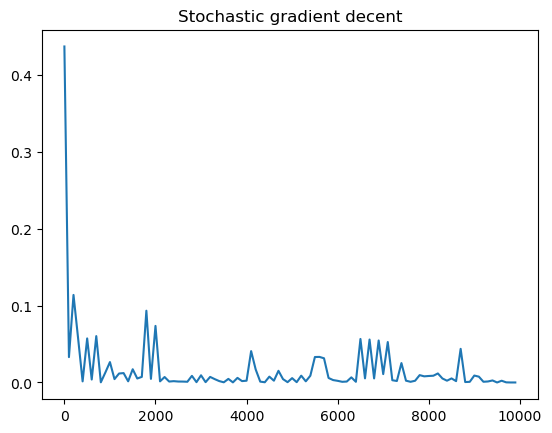

In [78]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.title("Stochastic gradient decent")

Text(0.5, 1.0, 'Batch gradient decent')

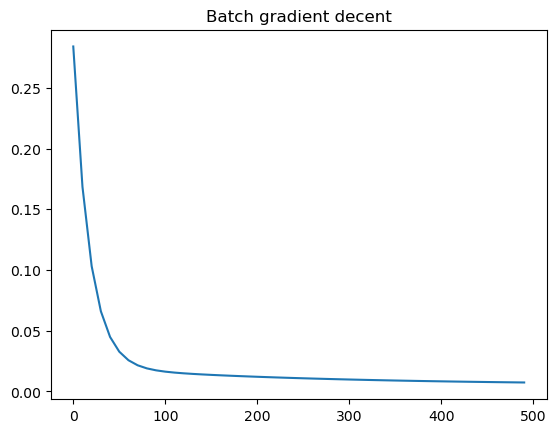

In [80]:
plt.plot(epoch_list, cost_list)
plt.title("Batch gradient decent")

## Exercise
Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples
Solution

In [151]:
X_train_scaled.shape
total_samples = len(X_train_scaled)

In [237]:
def mbgd(X, y_true, epochs, learning_rate = 0.01, batch_size=4):
    w = np.ones(shape = (X.shape[1]))
    b = 0
    total_samples = len(X)
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        indexes = np.random.choice(total_samples, int(total_samples/4), replace=False)
        batch_x = X[indexes]
        batch_y = y_true[indexes]

        #calculating Y_prediction of batch samples
        y_predicted = np.dot(w, batch_x.T) + b  #price = w1 * area + w2 * bedrooms + bias

        w_grad = -(2/total_samples)*(batch_x.T.dot(batch_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(batch_y-y_predicted)

        #Adjusting weights
        w = w-learning_rate * w_grad
        b = b-learning_rate * b_grad

        cost = np.mean(np.square(batch_y-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list


w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mbgd(X_train_scaled,y_train_scaled.reshape(y_train_scaled.shape[0],),10000)
w_mbgd, b_mbgd, cost_mbgd

(array([0.68894415, 0.50184268]), -0.12857861616969787, 0.0050873203429073685)

In [239]:
X_test

,area,bedrooms
0,1056,2
17,1540,3
15,1175,2
1,2600,4


In [241]:
y_test

0      39.07
17     60.00
15     42.00
1     120.00
Name: price, dtype: float64

In [247]:
def predict(area, bedrooms, w, b):
    scaled_X = scaler_X.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return scaler_y.inverse_transform([[scaled_price]])[0][0]
predict(2600,4,w_mbgd,b_mbgd)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


125.03451025014647

Text(0.5, 1.0, 'Mini-Batch gradient decent')

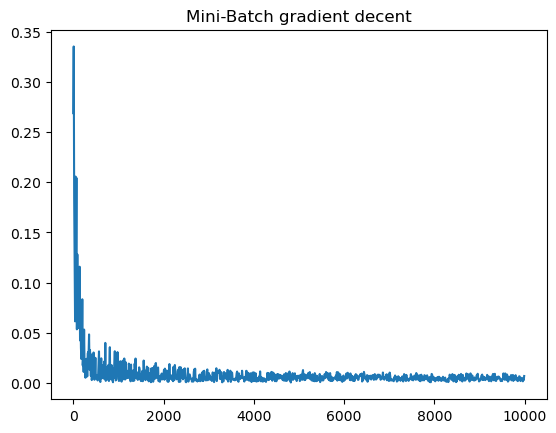

In [249]:
plt.plot(epoch_list_mbgd, cost_list_mbgd)
plt.title("Mini-Batch gradient decent")